In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
x = df.iloc[:, 1:2]
y = df['Salary'].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [28]:
regressor = SVR(kernel='rbf', gamma='auto') # this used for nonlinear

In [29]:
regressor.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<IPython.core.display.Javascript object>


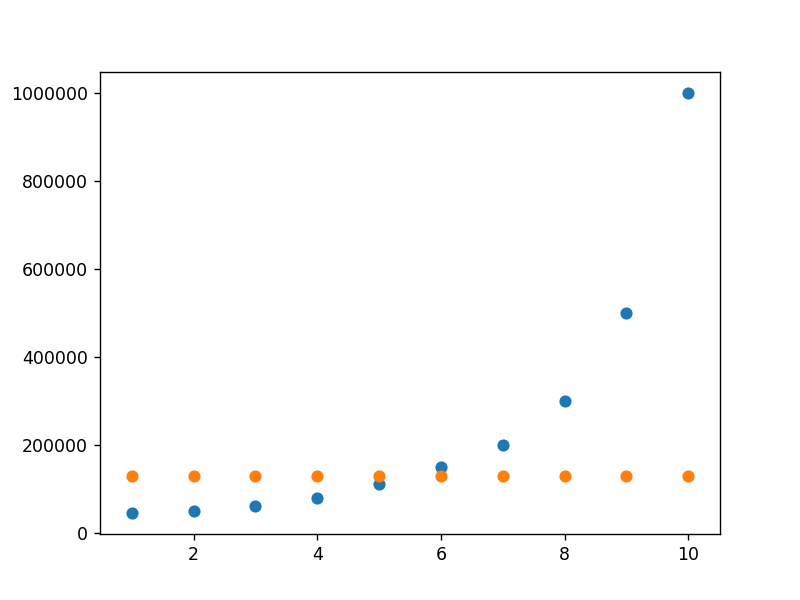

In [30]:
%matplotlib notebook
y_predicted = regressor.predict(x)
plt.scatter(x, y, label = 'raw data')
plt.scatter(x, y_predicted, label = 'SVR')

# Now Let's do feature scaling

In [32]:
SC = StandardScaler()
x_sc = SC.fit_transform(x)
SC = StandardScaler()
y_sc = SC.fit_transform(y.reshape(-1, 1))

In [33]:
regressor.fit(x_sc, y_sc)

C:\Users\fys-shared-user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<IPython.core.display.Javascript object>


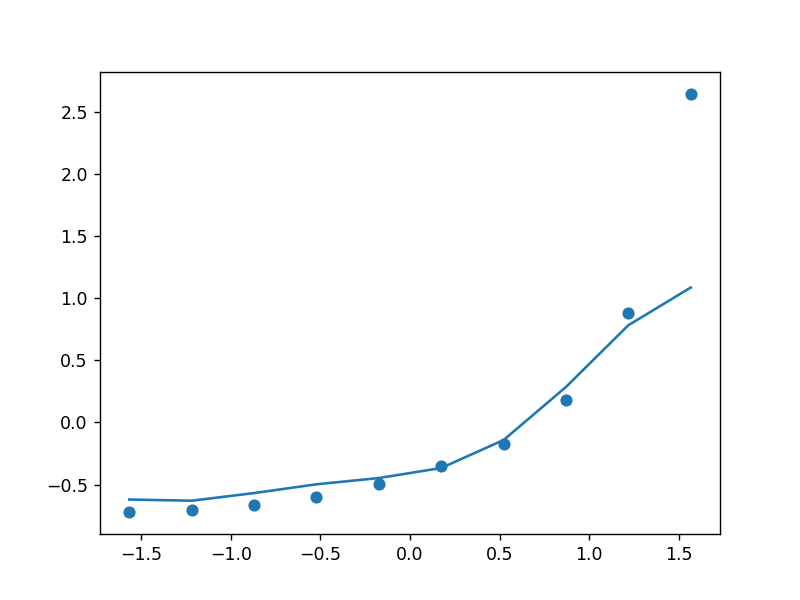

In [36]:
%matplotlib notebook
y_sc_predicted = regressor.predict(x_sc)
plt.scatter(x_sc, y_sc, label = 'raw data')
plt.plot(x_sc, y_sc_predicted, label = 'SVR')